# kNN k-Nearest Neighbors (Метод k-ближайших соседей)

Применение алгоритма kNN для решения задачи классификации.


### Датасет
Рассматривать задачу будем на примере известного датасета **Цветки Ириса**

Датасет [Цветки Ириса](https://archive.ics.uci.edu/ml/datasets/iris) содержит 150 записей, каждая из записей содержит 4 признака, т.е. $\boldsymbol x \in \mathbb{R}^4$. 

Что за 4 признака?

0. длина чашелистника, см
1. ширина чашелистника, см
2. длина лепестка, см 
3. ширина лепестка, см 

Метки классов

0. Setosa
1. Versicolour 
2. Virginica

## 0. Импорт библиотек

In [4]:
# программная реализация алгоритма kNN для классификации
from sklearn.neighbors import KNeighborsClassifier
# программная реализация расчета метрики точности
from sklearn.metrics import accuracy_score
# модуль для разделения выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split

# модуль, позволяющий подтягивать данные по хрестоматийным примерам для ML
from sklearn import datasets

# модули визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px

# библиотеки для работы с матрицами
import pandas as pd
import numpy as np

## 1. Загружаем данные по цветкам ирисов

Для этого воспользуемся встроенным в библиотеке `scikit-learn` модулем `datasets`

In [5]:
iris = datasets.load_iris()

> Что за тип данных `iris`?

In [10]:
type(iris)

sklearn.utils._bunch.Bunch

iris — это набор данных для задач машинного обучения, представляющий измерения чашелистиков и лепестков трёх видов ирисов — Iris setosa, Iris virginica и Iris versicolor.

Bunch — это объект-контейнер из библиотеки Scikit-Learn, который предоставляет ключи в качестве атрибутов.

In [11]:
# Выведите названия признаков
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
# Выведите данные по признакам
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
# Выведите информацию по целевой переменной (классам цветка)
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [14]:
# Выведите информацию по размерности датасета и целевой переменной
# чтобы убедиться, что размерности совпадают
print('Размерность признакового пространства {}'.format(len(iris.data)))
print('Размерность вектора целевой переменной {}'.format(len(iris.data)))

Размерность признакового пространства 150
Размерность вектора целевой переменной 150


In [29]:
# Вынесем признаки и целевую перемнную в отдельные переменные
X = iris.data
y = iris.target

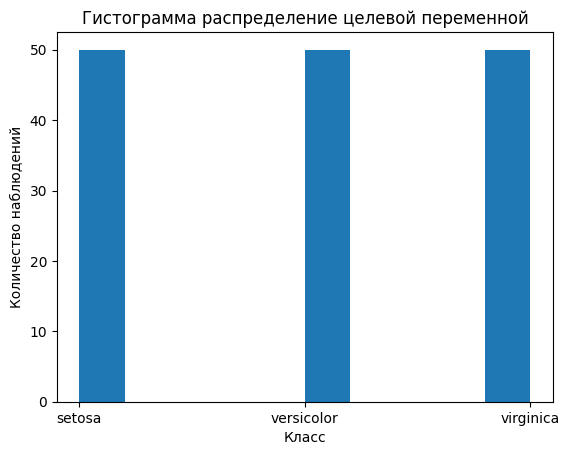

In [30]:
# Посмотрим на гистограмму распределения целевой переменной
# Убедитесь в сбалансированности классов
plt.xticks([0, 1, 2], iris.target_names)
plt.xlabel("Класс")
plt.ylabel("Количество наблюдений")
plt.title("Гистограмма распределение целевой переменной")
plt.hist(y)
plt.show()

Данные очень хорошо сбалансированы - каждого класса по 50 объектов.

> Выведите гистограммы для всех признаков X

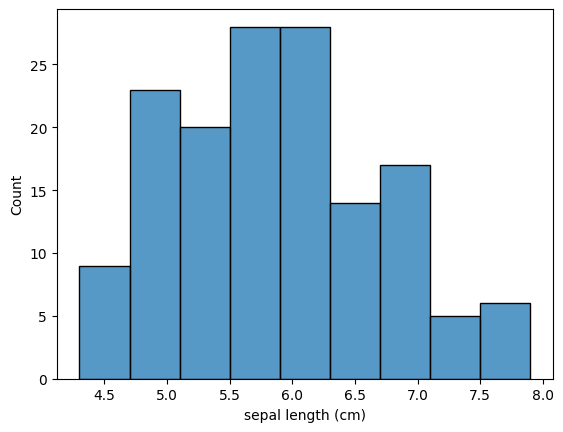

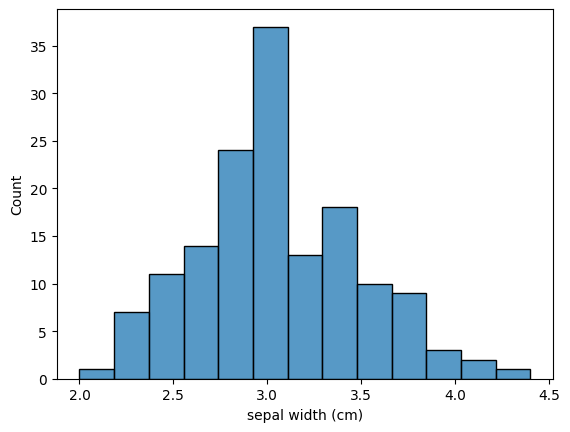

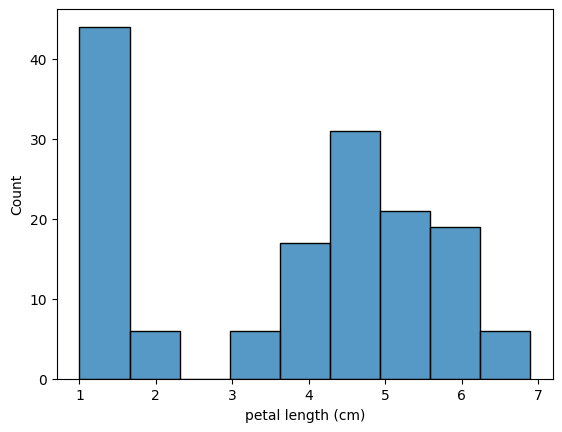

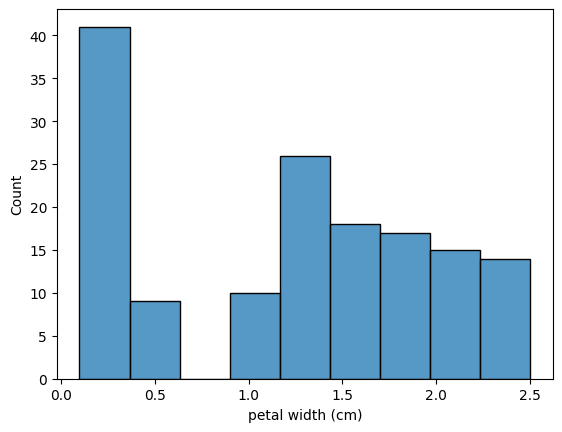

In [27]:
# type your code here
for i in range(4):
    #пустой график
    plt.figure()
    # построим гистограмму для выбранного признака
    sns.histplot(X[:, i])
    plt.xlabel(iris.feature_names[i])
    plt.show()

## 2. Визуально изобразим данные

Для отображения в двумерном пространстве выберем параметры `длина чашелистика, см` и `длина лепестка, см`

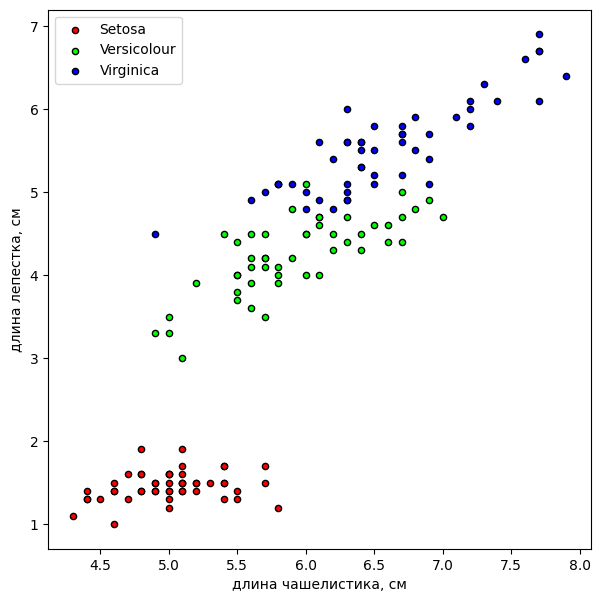

In [31]:
# список цветов для визуализации
cmap_bold = ListedColormap(['#FF0000',  '#00FF00', '#0000FF'])

# создадим полотно
fig, ax = plt.subplots(figsize=(7,7))
# отрисуем экземпляры 
for i, iris_class in enumerate(['Setosa', 'Versicolour', 'Virginica']):
    idx = y==i
    ax.scatter(X[idx,0], X[idx,2], 
               c=cmap_bold.colors[i], edgecolor='k', 
               s=20, label=iris_class);

ax.set(xlabel='длина чашелистика, см', ylabel='длина лепестка, см')
ax.legend();

> Создайте переменную `iris_df`, которая будет представлять собой DataFrame из всех X и целевой переменной

In [39]:
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['Класс цветка'] = y
iris_df['Класс цветка'] = iris_df["Класс цветка"].apply(lambda x: iris.target_names[x])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Класс цветка
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


> При помощи `sns.pairplot` выведите диаграммы рассеивания для всех попарных комбинаций признаков

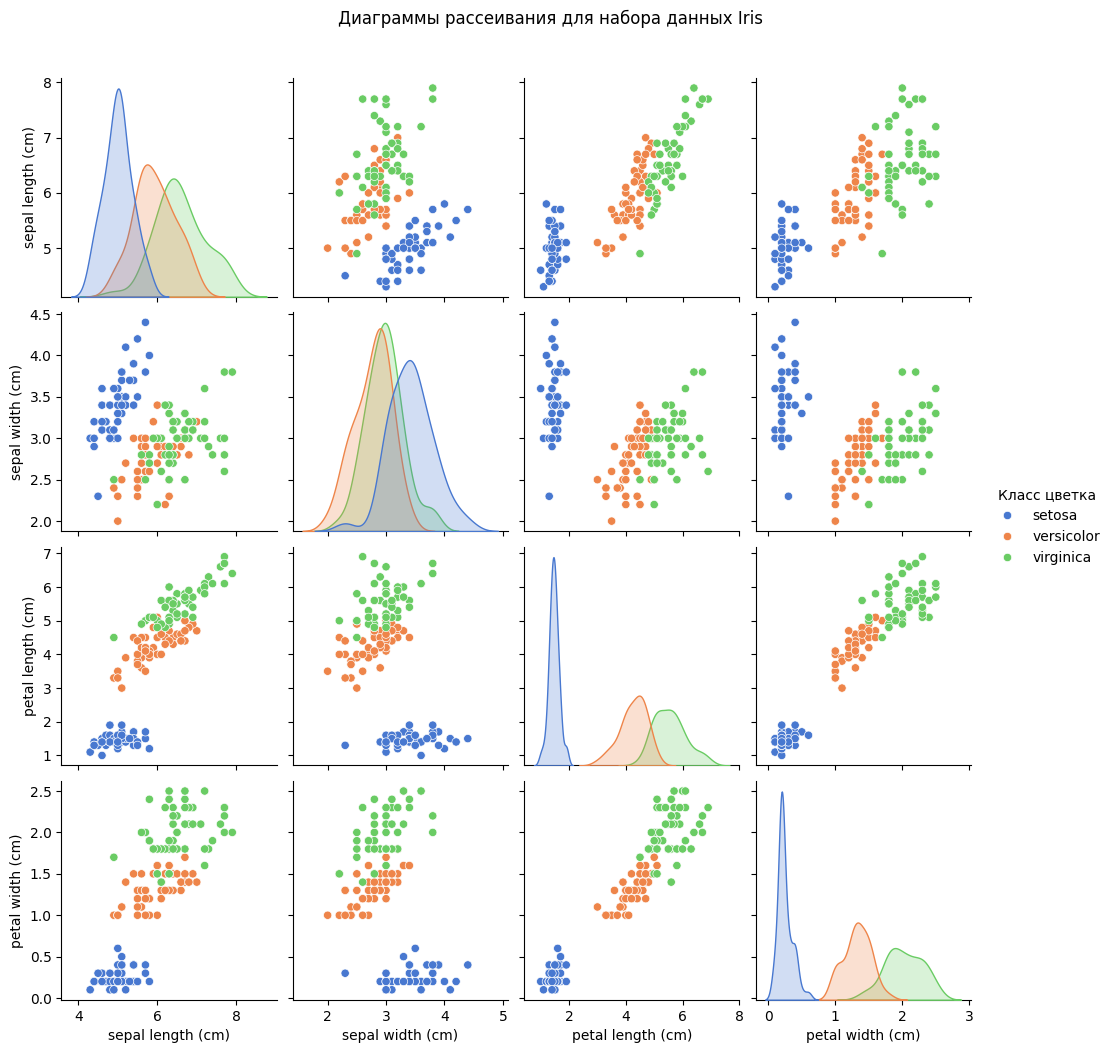

In [43]:
# type your code here
sns.pairplot(iris_df, hue='Класс цветка', palette='muted')
plt.suptitle("Диаграммы рассеивания для набора данных Iris", y = 1.05)
plt.show()

### Посмотрим на `plotly.express`

In [45]:
px.histogram(data_frame=iris_df,x='sepal length (cm)', color='Класс цветка')

In [46]:
df = px.data.iris()
fig = px.scatter(df, x=df.sepal_length, y=df.sepal_width, color=df.species, size=df.petal_length)
fig.show()

# 3. Обучение модели

Теперь давайте попробуем обучить модель, которая будет на основании параметров цветка, определять к какому сорту относится этот цветок.

## 3.1. Обучение на всех данных

In [47]:
# Создадим объект класса KNN с параметром n_neighbors=3
classifier_kNN = KNeighborsClassifier(n_neighbors=3)

# Обучение модели
classifier_kNN.fit(X, y)

# Прогноз
y_pred = classifier_kNN.predict(X)

In [48]:
# Посчитаем точность модели как долю верно классифицированных объектов
accuracy = accuracy_score(y, y_pred)*100
print('Точность модели равна на всей выборке ' + str(round(accuracy, 2)) + ' %.')

Точность модели равна на всей выборке 96.0 %.


## 3.2. Разбиение выборки на train и test

Если мы будем оценивать качество модели на тех же данных, на которых обучали модель, как в примере выше, то будет происходить процесс заучивания ответов, а не поиска закономерностей в данных. В таком случае, модель не будет обладать обобщающей способностью и когда на вход прилетят новые данные, точность подобного прогноза будет сильно ниже, чем на данных, на которых модель обучалась.

В машинном обучении принято разделять данные на обучающую (**training set**) и тестовую (**test set**) выборки с тем, чтобы повысить обобщающую способность модели, т.е. способность делать прогнозы на данных, которые не участвовали при обучении.

Некоторым стандартом принято использовать разбиение 80 на 20, где 80% - размер обучающей выборки, 20% - размер тестовой выборки. Это не прибитые гвоздем значения, в зависимости от задачи они конечно могут меняться, но если нет никаких вводных по размерам этих групп, в первом приближении можно брать такое разбиение.

При разбиении важно учесть, чтобы и в тестовой и в обучающей выборках данные были распределены корректно. Стратификацию можно реализовать самостоятельно, но более оптимальным решением является использование готовой библиотеки `sklearn` и конкретно модулем `train_test_split`.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

> # Задание 1
>
> При помощи функции `mean()` посчитайте среднее значение для параметра **sepal length (cm)** (первый столбец в X) и введите в  поле ответа модуль разности между значениями для X_train и X_test (округлите до второго знака).

In [50]:
# type your code here
print(iris_df['sepal length (cm)'].mean())
print(round(abs(X_test.mean() - X_train.mean()), 2))

5.843333333333334
0.13


А теперь приступим к обучению модели на новом разбиении данных

In [51]:
# Создадим объект класса KNN с параметром n_neighbors=5
classifier_kNN_robust = KNeighborsClassifier(n_neighbors=5)

# Обучение модели на обучающей выборке
classifier_kNN_robust.fit(X_train, y_train)

# Прогноз на тестовых данных
y_pred = classifier_kNN_robust.predict(X_test)

In [52]:
# Посчитаем точность модели как долю верно классифицированных объектов
accuracy = accuracy_score(y_test, y_pred)*100
print('Точность модели на тестовой выборке равна ' + str(round(accuracy, 2)) + ' %.')

Точность модели на тестовой выборке равна 96.67 %.


> # Задание 2
>
> Найдите оптимальное количество соседей для алгоритма в диапазоне [2;40]. Если для каких-то значений параметра `n_neighbours` будет одинаковая метрика accuracy, предпочтительнее брать модель с меньшим параметром. Ответ занесите в форму.

In [56]:
n_neighbours = range(2,41)
acc_list = []

for n_n in n_neighbours:
    classifier_kNN_robust = KNeighborsClassifier(n_neighbors=n_n)
    classifier_kNN_robust.fit(X_train, y_train)
    y_pred = classifier_kNN_robust.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    acc_list.append(round(accuracy,2))

In [57]:
best_k = n_neighbours[acc_list.index(max(acc_list))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


[93.33, 96.67, 96.67, 96.67, 93.33, 93.33, 93.33, 90.0, 93.33, 90.0, 93.33, 93.33, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 86.67, 86.67, 83.33, 86.67, 86.67, 86.67, 86.67, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 93.33, 93.33, 93.33, 93.33, 93.33]


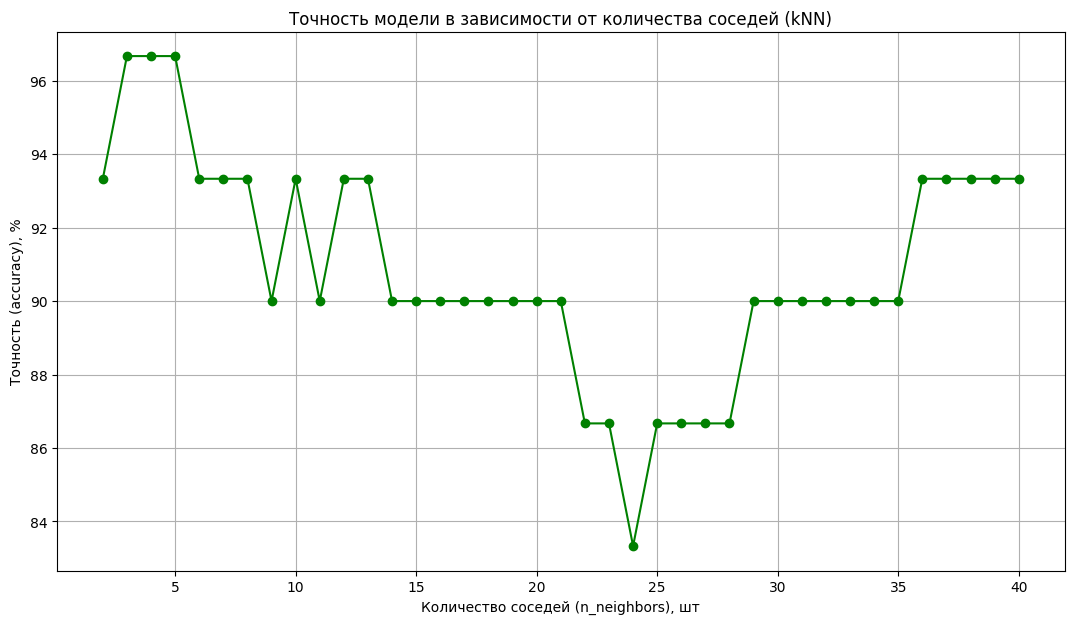

In [63]:
# plot acc_list
print(acc_list)
plt.figure(figsize=(13, 7))
plt.plot(n_neighbours, acc_list, marker="o", c="g")
plt.title("Точность модели в зависимости от количества соседей (kNN)")
plt.xlabel("Количество соседей (n_neighbors), шт")
plt.ylabel("Точность (accuracy), %")
plt.grid(True)
plt.show()

Из графика видно, что максимальная точность модели достигается при 3-5 соседях.

Так как предпочтительнее брать модель с меньшим параметром, то оптимальное значение соседей будет 3.